#### scIB model benchmarking using scIB of Cai healthy PBMC data


**Objective**: Asssess manifolds of healthy PBMC scRNA samples from Cai2020 and Yoshida 2021 with scIB-metrics

**Developed by**: Mairi McClean

**Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich

-v230705

### Load modules and set figure params

In [1]:
import scanpy as sc
import scvi
import matplotlib.pyplot as plt
from rich import print
from scib_metrics.benchmark import Benchmarker




Global seed set to 0
/Users/mairi.mcclean/mambaforge/envs/scvi_sccaf_local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/mairi.mcclean/mambaforge/envs/scvi_sccaf_local/lib/python3.8/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/Users/mairi.mcclean/mambaforge/envs/scvi_sccaf_local/lib/python3.8/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [2]:
sc.set_figure_params(figsize=(4, 4))

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

### Read in data for assessment

In [3]:
adata = sc.read_h5ad('/Users/mairi.mcclean/example_data_lake/processed_files/scvi_integration/PBMC_TB/CaiY_Yoshida_healthy_scRNA_PBMC_mm230705_scVI-clustered.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 195720 × 17012
    obs: 'study', 'tissue', 'donor', 'status', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrX', 'doublet_scores', 'dataset', '_scvi_batch', '_scvi_labels', 'Model_1', 'Model_2', 'Model_3'
    var: 'mt', 'ribo', 'hb', 'gene_id-caiy2020', 'n_cells-caiy2020', 'n_cells_by_counts-caiy2020', 'mean_counts-caiy2020', 'pct_dropout_by_counts-caiy2020', 'total_counts-caiy2020', 'n_cells-yoshida2021', 'n_cells_by_counts-yoshida2021', 'mean_counts-yoshida2021', 'pct_dropout_by_counts-yoshida2021', 'total_counts-yoshida2021', 'name-yoshida2021'
    uns: 'Model_1_colors', 'Model_2_colors', 'Model_3_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dataset_colors', 'donor_colors', 'hvg', 'leiden', 'neighbors', 'umap'
    obsm: 'X_scVI_1', 'X_scVI_2', 'X_scVI_3', 'X_umap'
    obsp: 'connectivities', 'distances'

### Benchmarking using scVI

In [4]:
adata.obs

,study,tissue,donor,status,total_counts_hb,pct_counts_hb,mt_ok,percent_chrX,doublet_scores,dataset,_scvi_batch,_scvi_labels,Model_1,Model_2,Model_3
AAACCTGAGATGGCGT-H2-caiy2020,CaiY_2021,PBMC,SAMN14048020,Healthy,0.0,0.000000,True,5.432526,0.319859,caiy2020,0,0,1,8,6
AAACCTGAGATGTGTA-H2-caiy2020,CaiY_2021,PBMC,SAMN14048020,Healthy,0.0,0.000000,True,6.448477,0.043830,caiy2020,0,0,6,2,1
AAACCTGAGCAACGGT-H2-caiy2020,CaiY_2021,PBMC,SAMN14048020,Healthy,1.0,0.034953,True,3.914715,0.127650,caiy2020,0,0,1,4,7
AAACCTGAGCCATCGC-H2-caiy2020,CaiY_2021,PBMC,SAMN14048020,Healthy,0.0,0.000000,True,5.175688,0.284010,caiy2020,0,0,1,8,10
AAACCTGAGGTGATTA-H2-caiy2020,CaiY_2021,PBMC,SAMN14048020,Healthy,0.0,0.000000,True,4.438356,0.055394,caiy2020,0,0,1,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV001_KM9166642-CV001_KM9166650_TTTGTCAGTCGCATCG-1-yoshida2021,Yoshida_2021,PBMC,NP32,Healthy,0.0,0.000000,True,4.867635,0.077112,yoshida2021,1,0,5,6,2
CV001_KM9166642-CV001_KM9166650_TTTGTCAGTGTAAGTA-1-yoshida2021,Yoshida_2021,PBMC,NP32,Healthy,1.0,0.052966,True,2.171610,0.015326,yoshida2021,1,0,12,13,13
CV001_KM9166642-CV001_KM9166650_TTTGTCATCATGTCCC-1-yoshida2021,Yoshida_2021,PBMC,NP31,Healthy,1.0,0.055617,True,4.838709,0.014490,yoshida2021,1,0,0,3,5
CV001_KM9166642-CV001_KM9166650_TTTGTCATCGAGGTAG-1-yoshida2021,Yoshida_2021,PBMC,NP31,Healthy,0.0,0.000000,True,4.651690,0.047177,yoshida2021,1,0,5,6,2


In [6]:
bm = Benchmarker(adata, 
                 batch_key="dataset", 
                 label_key=['Model_1', 'Model_2', 'Model_3'],
                 embedding_obsm_keys=["X_scVI_1", "X_scVI_2", "X_scVI_3"],
                 n_jobs=6,
                 )



bm.benchmark()

 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value


/Users/mairi.mcclean/mambaforge/envs/scvi_sccaf_local/lib/python3.8/site-packages/scanpy/preprocessing/_pca.py:283: RuntimeWarning: invalid value encountered in subtract
  return Xdot(x) - mdot(x)


 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value
 ** On entry to SLASCL parameter number  4 had an illegal value


ArpackError: ARPACK error -9999: Could not build an Arnoldi factorization. IPARAM(5) returns the size of the current Arnoldi factorization. The user is advised to check that enough workspace and array storage has been allocated.

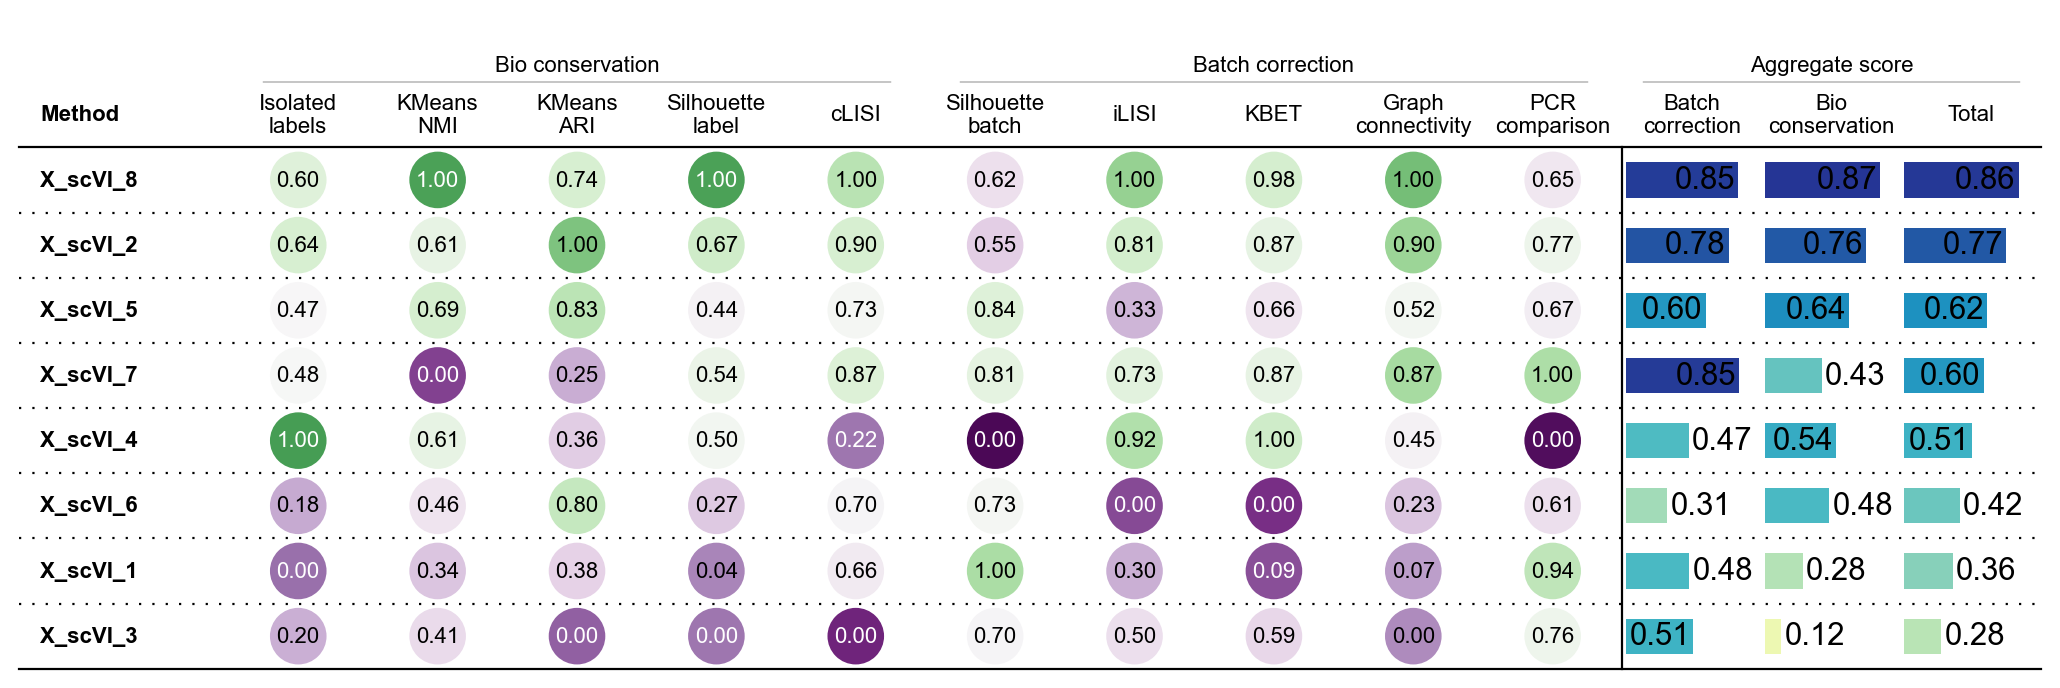

In [96]:
# Benchmark vis

bm.plot_results_table()

In [ ]:
# from rich import print

df = bm.get_results(min_max_scale=False)
print(df)

Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                           
X_scVI_1             0.523559          0.464472          0.288238   
X_scVI_2             0.534474          0.492339          0.356861   
X_scVI_3             0.524438          0.484389          0.312071   
X_scVI_4             0.536906          0.483577          0.262632   
X_scVI_5             0.533209          0.438284          0.287378   
X_scVI_6             0.527048          0.409925          0.231251   
X_scVI_7             0.532606          0.493494          0.348754   
X_scVI_8              0.53433          0.459336          0.311309   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

             Silhouette label             cLISI  Silhouette batch  \
Embedding                                                           
X_scVI_1             0.512065          0.976573          0.977945   
X_scVI_2             0.530273          0.990408          0.969066   
X_scVI_3             0.513911           0.97912          0.978806   
X_scVI_4             0.528098          0.962025          0.969824   
X_scVI_5             0.518885          0.979613          0.975012   
X_scVI_6             0.516904           0.98004          0.978895   
X_scVI_7             0.526844          0.981521          0.972739   
X_scVI_8             0.533312          0.992389          0.971819   
Metric Type  Bio conservation  Bio conservation  Batch correction   

                        iLISI              KBET Graph connectivity  \
Embedding                                                            
X_scVI_1             0.848253          0.777648           0.879842   
X_scVI_2             0.864161          0.816723           0.956893   
X_scVI_3             0.836031           0.74394           0.874733   
X_scVI_4             0.866321          0.816797            0.89601   
X_scVI_5             0.849916          0.803499           0.921373   
X_scVI_6             0.847234          0.786873           0.888975   
X_scVI_7             0.863254          0.825286           0.956741   
X_scVI_8             0.862812           0.81803           0.984583   
Metric Type  Batch correction  Batch correction   Batch correction   

               PCR comparison Batch correction Bio conservation  \
Embedding                                                         
X_scVI_1             0.968959         0.890529         0.552981   
X_scVI_2              0.96308         0.913985         0.580871   
X_scVI_3             0.970347         0.880772         0.562786   
X_scVI_4             0.945823         0.898955         0.554648   
X_scVI_5             0.957155         0.901391         0.551474   
X_scVI_6             0.967336         0.893863         0.533033   
X_scVI_7             0.956625         0.914929         0.576644   
X_scVI_8             0.963905          0.92023         0.566135   
Metric Type  Batch correction  Aggregate score  Aggregate score   

                       Total  
Embedding                     
X_scVI_1            0.688001  
X_scVI_2            0.714117  
X_scVI_3             0.68998  
X_scVI_4            0.692371  
X_scVI_5            0.691441  
X_scVI_6            0.677365  
X_scVI_7            0.711958  
X_scVI_8            0.707773  
Metric Type  Aggregate score